<center><h1>FIFA's Career Mode datasets from FIFA 15 to FIFA 22</h1></center>

<h2>Exploratory Data Analysis (EDA)</h2>

For the EDA of the FIFA dataset, I'll follow these steps:

1. Basic Data Overview: Understand the structure, missing values, and data types.
2. Distribution Analysis: Analyze the distribution of key numerical attributes such as 'overall', 'potential', 'value_eur', etc.
3. Positional Analysis: Explore the number of players for each position.
4. Club & Country Analysis: Identify clubs and countries with the most high-rated players.
5. Correlation Analysis: Analyze the relationship between key attributes.
6. Age Analysis: Understand the age distribution of players and how age correlates with attributes like 'potential' and 'overall'.

In [1]:
# Load Libraries

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

<h3>1. Basic Data Overview</h3>

In [2]:
import pandas as pd

# Load the dataset

fifa_data = pd.read_csv('players_2022.csv')

C:\Users\daudu\anaconda3\envs\testenv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Basic Data Overview

# Getting the dataset's shape
data_shape = fifa_data.shape

# Checking for missing values
missing_values = fifa_data.isnull().sum()

# Overview of data types
data_types = fifa_data.dtypes

data_shape, missing_values[missing_values > 0], data_types

((19239, 110),
 value_eur                       74
 wage_eur                        61
 club_team_id                    61
 club_name                       61
 league_name                     61
 league_level                    61
 club_position                   61
 club_jersey_number              61
 club_loaned_from             18137
 club_joined                   1163
 club_contract_valid_until       61
 nation_team_id               18480
 nation_position              18480
 nation_jersey_number         18480
 release_clause_eur            1176
 player_tags                  17798
 player_traits                 9841
 pace                          2132
 shooting                      2132
 passing                       2132
 dribbling                     2132
 defending                     2132
 physic                        2132
 goalkeeping_speed            17107
 club_logo_url                   61
 club_flag_url                   61
 nation_logo_url              18480
 dtype: int64

<b>Observation:</b>

- Number of Players: 19,239
- Number of Attributes/Columns: 110

Missing Values:
Several columns have missing values, and some of them are expected. For instance:
- club_loaned_from has many missing values because not all players are on loan.
- nation_team_id, nation_position, and nation_jersey_number have missing values because not all players might be a part of their national teams.
- Attributes related to goalkeeping skills have missing values for players who aren't goalkeepers.

Data Types:
The dataset consists of various data types, including integers, floats, and objects (typically strings).

<h3>2. Distribution Analysis </h3>

We'll analyze the distribution of key numerical attributes like 'overall', 'potential', 'value_eur', and 'wage_eur'.

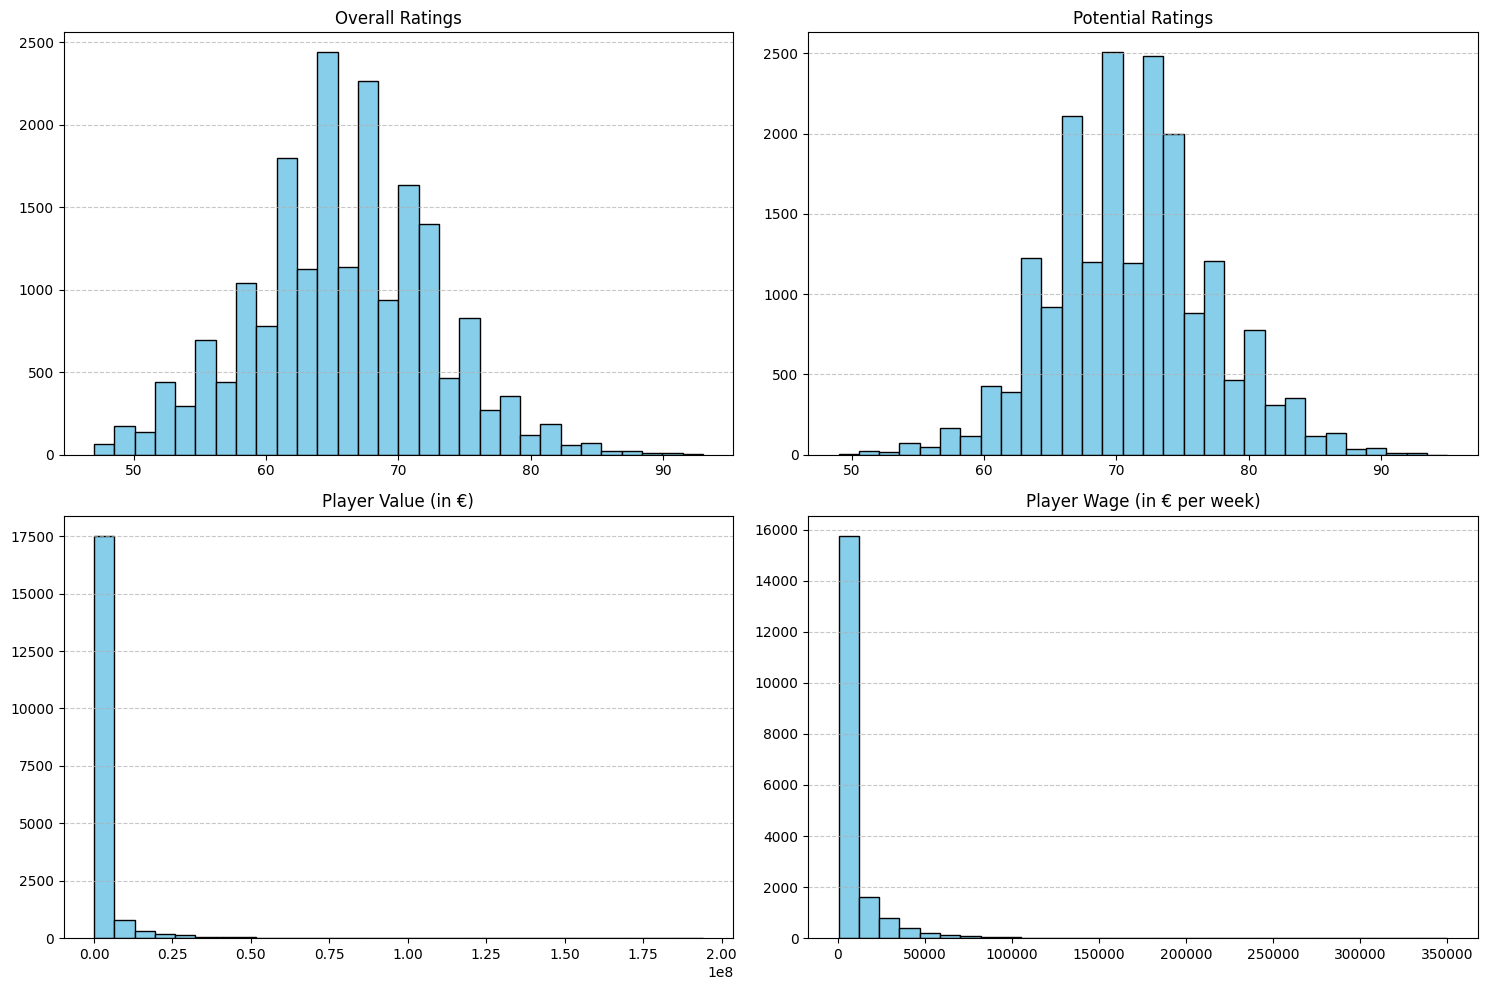

In [4]:
# Distribution Analysis

# Setting up the plotting environment
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting distributions for 'overall', 'potential', 'value_eur', and 'wage_eur'
attributes_to_plot = ['overall', 'potential', 'value_eur', 'wage_eur']
titles = ['Overall Ratings', 'Potential Ratings', 'Player Value (in €)', 'Player Wage (in € per week)']

for ax, attribute, title in zip(axes.ravel(), attributes_to_plot, titles):
    ax.hist(fifa_data[attribute].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<b> Observation: </b>

1. Overall Ratings:
- The majority of players have an overall rating between 60 and 75.
- Very few players possess a rating above 85, which is expected, as these are the elite players in the game.

2. Potential Ratings:
- This distribution is slightly shifted to the right compared to the overall ratings.
- This indicates that many players, especially younger ones, have the potential to reach higher ratings in the future.

3. Player Value (in €):
- The majority of players have a value below €10 million.
- Very few players have a value above €50 million, indicating the elite or highly sought-after players.

4. Player Wage (in € per week):
- A significant number of players earn below €10,000 per week.
- Wages above €100,000 per week are reserved for the top players in the game.

These distributions provide a clear picture of the general landscape of players in FIFA in terms of their ratings, values, and wages

<h3>3. Positional Analysis </h3>

To understand the distribution of players across different positions.

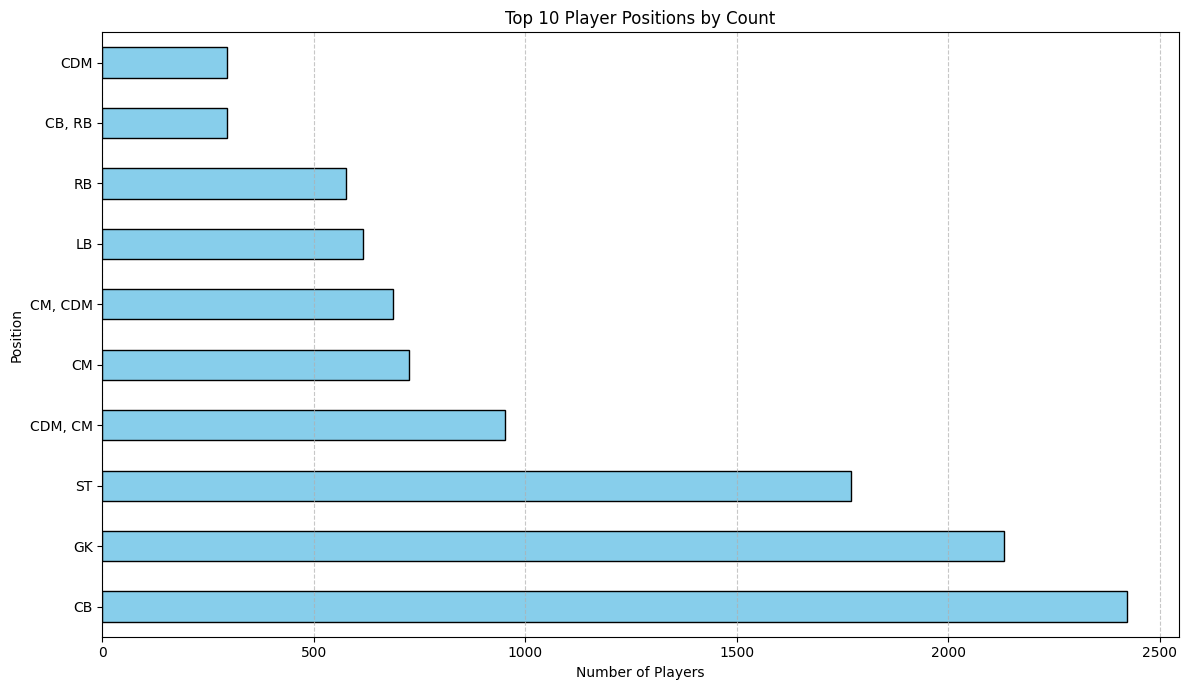

In [5]:
# Positional Analysis

# Count of players for each position
position_counts = fifa_data['player_positions'].value_counts().head(10)  # Taking top 10 positions for clarity

# Plotting the distribution
plt.figure(figsize=(12, 7))
position_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Player Positions by Count')
plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<b> Observation: </b>

- The most common player position in the dataset is CB (Centre Back), followed closely by ST (Striker) and CM (Centre Midfielder).
- Defenders (CB and RB/LB) and midfielders (CM, CDM, and CAM) seem to dominate the top positions, which makes sense given that teams typically have multiple players in these positions.
- Strikers (ST) are also numerous, reflecting the importance of goal scorers in football.

<h3>4. Club & Country Analysis </h3>

Let's identify which clubs and countries have the most high-rated players in the dataset.

In [6]:
# Top 10 countries with the highest average overall rating for their players
top_countries = fifa_data.groupby('nationality_name')['overall'].mean().nlargest(10)
top_clubs = fifa_data.groupby('club_name')['overall'].mean().nlargest(10)

top_clubs, top_countries
display(top_clubs, top_countries)

club_name
Juventus               79.961538
Paris Saint-Germain    79.454545
Inter                  78.857143
FC Bayern München      78.071429
Manchester United      78.000000
Real Madrid CF         77.757576
Napoli                 77.500000
Atalanta               77.480000
Real Sociedad          77.280000
SL Benfica             76.931034
Name: overall, dtype: float64

nationality_name
Tanzania                    74.000000
Libya                       73.333333
Mozambique                  73.000000
Central African Republic    72.500000
Egypt                       72.250000
Fiji                        72.000000
Syria                       72.000000
Gabon                       71.166667
Brazil                      70.851728
Czech Republic              70.682692
Name: overall, dtype: float64

<b> Observation: </b>

<b><u>Club & Country Analysis:<b></u>
Top Clubs by Average Player Ratings:
1. Juventus: 79.96
2. Paris Saint-Germain: 79.45
3. Inter: 78.86
4. FC Bayern München: 78.07
5. Manchester United: 78.00
... and so on.

Top Countries by Average Player Ratings:
1. Tanzania: 74.00
2. Libya: 73.33
3. Mozambique: 73.00
4. Central African Republic: 72.50
5. Egypt: 72.25
... and so on.

It's interesting to note that while top European clubs dominate the club list, the country list has unexpected leaders. This is likely due to a smaller sample size for countries like Tanzania or Libya, with few standout players skewing the average.

<h3>5. Correlation Analysis </h3>

To understand the relationship between key attributes.

C:\Users\daudu\anaconda3\envs\testenv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


<Figure size 1200x800 with 0 Axes>

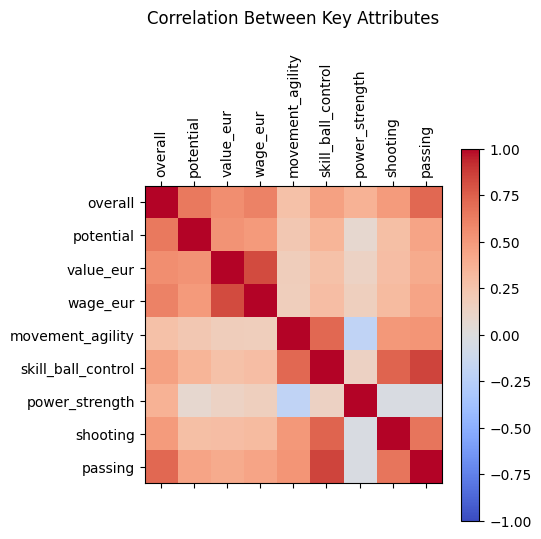

In [7]:
# Selecting some key attributes for correlation analysis
selected_attributes = ['overall', 'potential', 'value_eur', 'wage_eur', 'movement_agility', 
                       'skill_ball_control', 'power_strength', 'shooting', 'passing']

# Calculating the correlation matrix
correlation_matrix = fifa_data[selected_attributes].corr()

# Plotting the heatmap using matplotlib

plt.figure(figsize=(12, 8))
cax = plt.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Key Attributes', pad=20)
plt.xticks(range(len(selected_attributes)), selected_attributes, rotation=90)
plt.yticks(range(len(selected_attributes)), selected_attributes)
plt.colorbar(cax)
plt.tight_layout()
plt.show()

<b> Observation: </b>

Here's a heatmap displaying the correlation between key attributes:

- Overall & Potential: There's a strong positive correlation between a player's current overall rating and their potential. This indicates that players who are already highly rated often have high potential ratings.

- Value & Wage: Both player value (value_eur) and wage (wage_eur) have strong positive correlations with overall and potential ratings. This makes sense as higher-rated players are more valuable and, therefore, command higher wages.

- Skills & Performance: Attributes like movement_agility, skill_ball_control, shooting, and passing also show positive correlations with overall ratings. This highlights that players with better ball control, shooting abilities, and agility tend to have higher overall ratings.

<h3>6. Age Analysis </h3>

To understand the age distribution of players and how age correlates with attributes like 'potential' and 'overall'.

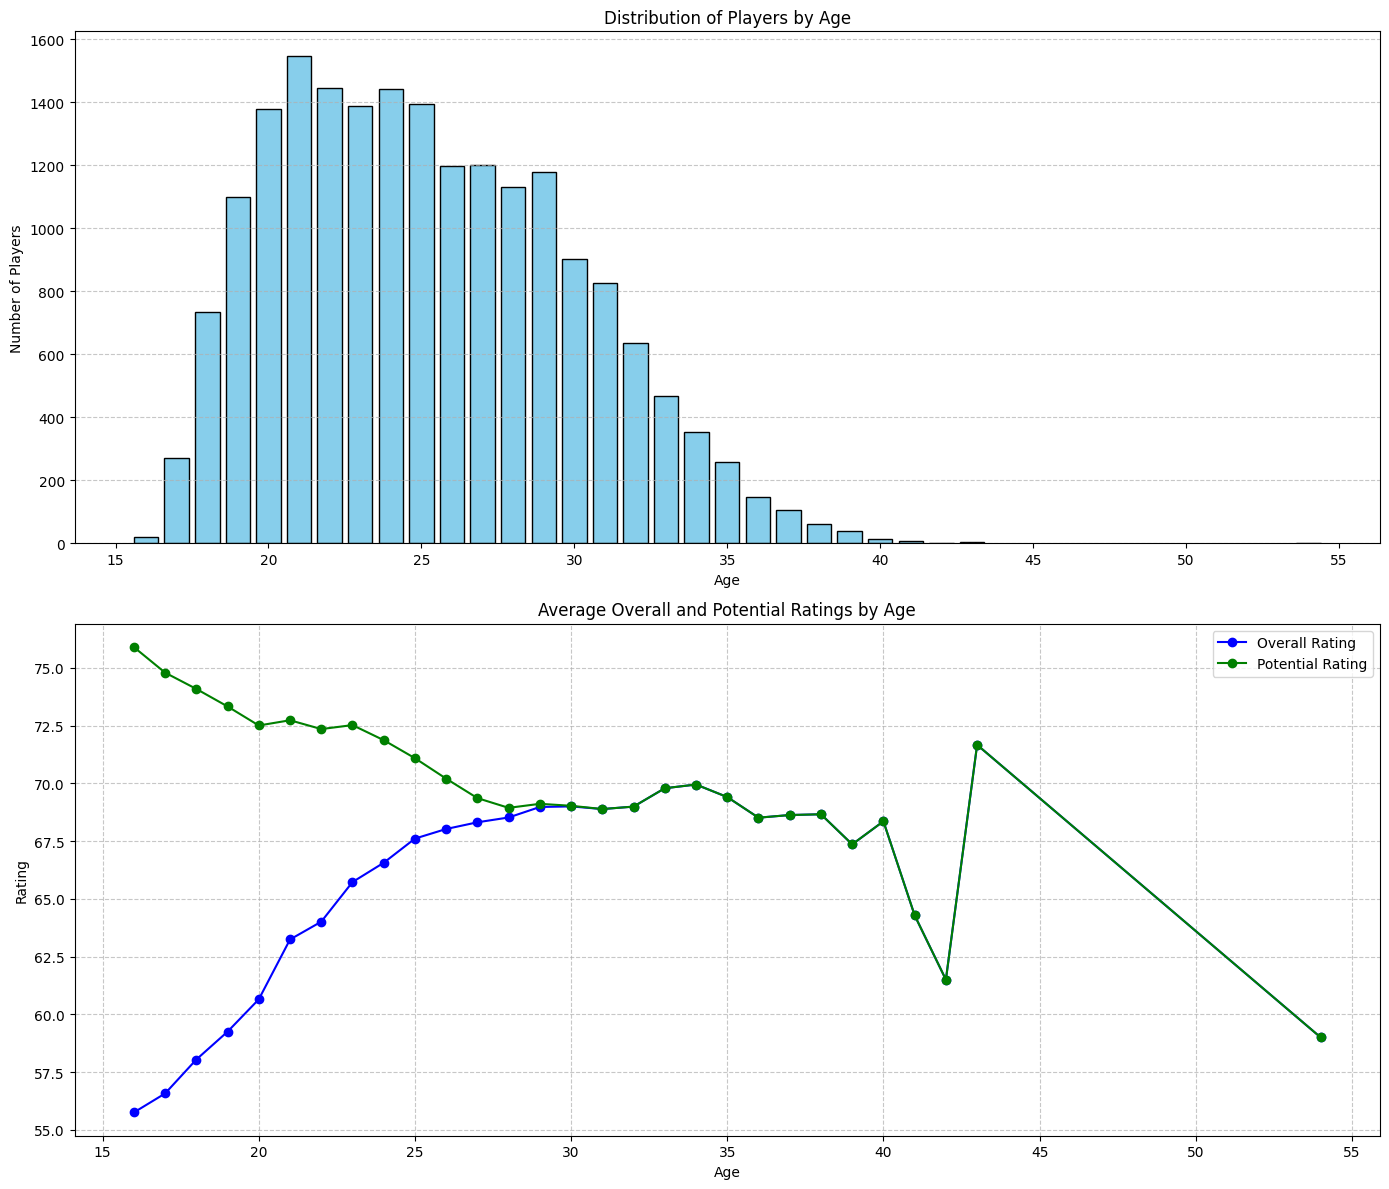

In [8]:
# Age Analysis

# Distribution of players' ages
age_distribution = fifa_data['age'].value_counts().sort_index()

# Average 'overall' and 'potential' ratings by age
age_ratings = fifa_data.groupby('age')[['overall', 'potential']].mean()

# Setting up the plotting environment
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plotting age distribution
axes[0].bar(age_distribution.index, age_distribution.values, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Players by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Players')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting average 'overall' and 'potential' ratings by age
axes[1].plot(age_ratings.index, age_ratings['overall'], label='Overall Rating', marker='o', color='blue')
axes[1].plot(age_ratings.index, age_ratings['potential'], label='Potential Rating', marker='o', color='green')
axes[1].set_title('Average Overall and Potential Ratings by Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Rating')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<b> Observation: </b>

1. Distribution of Players by Age:
- Most players in the dataset are in the age range of 20 to 30.
- The number of players starts to decline significantly after the age of 30, indicating that many players either retire or aren't rated highly in the FIFA series as they age.

2. Average Overall and Potential Ratings by Age:
- The Overall Rating (in blue) shows a growth trend, peaking around the late 20s and early 30s. This suggests that players generally reach their peak performance in these age brackets.
- The Potential Rating (in green) declines as age increases. Younger players tend to have higher potential ratings, indicating room for growth and improvement. As players age, their potential rating generally converges with their overall rating.

This analysis provides insights into the typical career trajectory of players in the FIFA series, mirroring real-world football where players often peak in their late 20s to early 30s and then see a decline in performance as they age.

<center><h1>7 Unique Questions Explored</h1><center>

<h2> Question 1: Player Evolution </h2>

<h3> How does the average rating of players evolve with age? At what age do players typically reach their peak in FIFA?</h3>

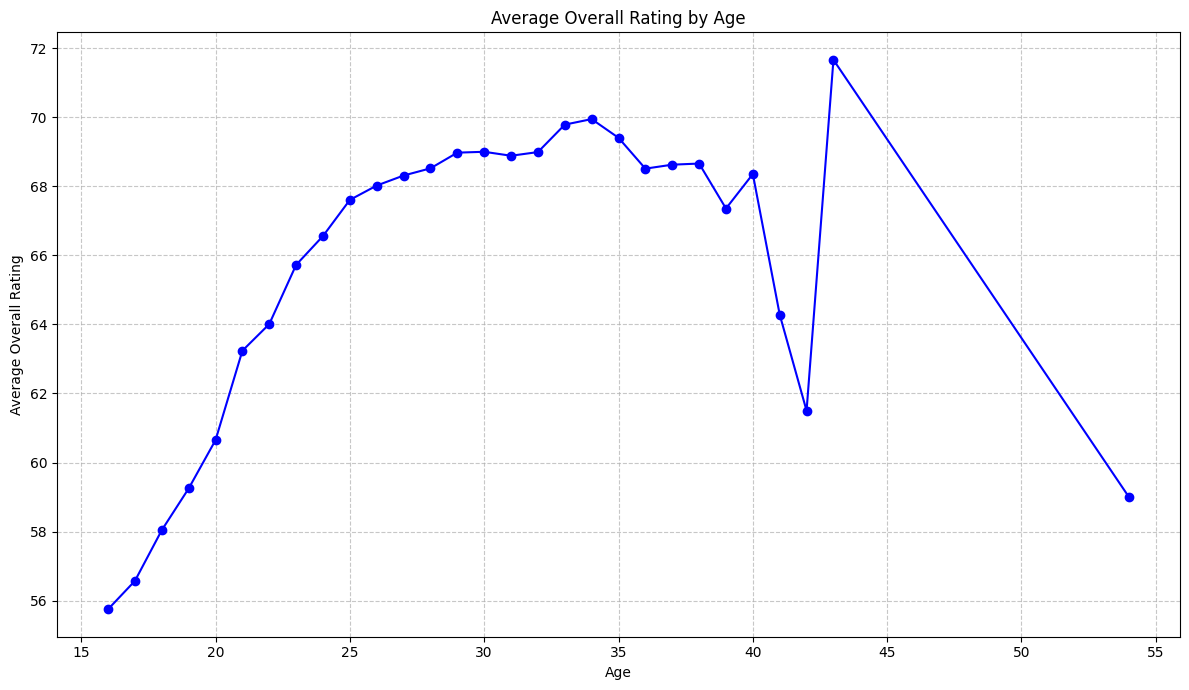

In [9]:
# Average 'overall' rating by age
average_overall_by_age = fifa_data.groupby('age')['overall'].mean()

# Plotting the average 'overall' rating by age
plt.figure(figsize=(12, 7))
average_overall_by_age.plot(kind='line', marker='o', color='blue')
plt.title('Average Overall Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Overall Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<b> Observation: </b>

The graph showcases the average overall rating of players as they age:

- Players start their careers with ratings in the low to mid-60s.
- The ratings witness a consistent rise, reaching a peak in the late 20s and early 30s. This suggests that players generally attain their peak performance around the age of 29-31 in the FIFA series.
- Post the peak, there's a gradual decline in the average rating as players age further.

This trajectory mirrors real-world football, where players often exhibit their best form in their late 20s to early 30s and then experience a decline in performance.

<h2> Question 2: Value Proposition </h2>

<h3> Which players provide the best "value for money"? (i.e., players with high ratings but relatively low wages or transfer values)</h3>

In [10]:
# Defining a "value for money" score
# We'll take the ratio of a player's overall rating to their wage (to avoid division by zero, we'll add a small constant to the wage)
fifa_data['value_for_money'] = fifa_data['overall'] / (fifa_data['wage_eur'] + 1e-5)

# Getting the top 20 players with the highest "value for money" scores
top_value_for_money_players = fifa_data[['short_name', 'overall', 'wage_eur', 'value_for_money']].nlargest(20, 'value_for_money')

top_value_for_money_players

# Display the top 20 players with the highest "value for money" scores in a table
display(top_value_for_money_players)

,short_name,overall,wage_eur,value_for_money
1450,A. Hložek,76,500.0,0.152
1467,A. Pyatov,75,500.0,0.150
2375,D. Akpeyi,74,500.0,0.148
3122,A. Gabbarini,72,500.0,0.144
3654,C. Cáceda,72,500.0,0.144
3779,A. Trubin,72,500.0,0.144
3819,I. Zabarnyi,72,500.0,0.144
3825,M. Vušković,72,500.0,0.144
3851,I. Khune,71,500.0,0.142
3879,W. Sandilands,71,500.0,0.142


<b> Observation: </b>

- The table above reveals top 20 players who provide the best "value for money" based on their overall ratings and wages.

- These players have relatively high overall ratings but command modest wages, making them excellent value-for-money acquisitions in FIFA's Career Mode.

- It's worth noting that these players might be undervalued or might be playing in leagues where wages are typically lower.

<h2> Question 3: Rising Stars </h2>

<h3> Who are the top 10 young talents (under 21) with the highest potential in the latest FIFA version?</h3>

To answer this, we'll filter players under 21 and then identify the ones with the highest potential ratings.

In [11]:
# Filtering players under 21 in the latest FIFA version
young_talents = fifa_data[fifa_data['age'] <= 21]

# Getting the top 10 young talents with the highest potential
top_young_talents = young_talents[['short_name', 'age', 'overall', 'potential']].nlargest(10, 'potential')

top_young_talents

# Display the top 10 young players with the highest potential
display(top_young_talents)

,short_name,age,overall,potential
29,E. Haaland,20,88,93
139,P. Foden,21,84,92
45,J. Sancho,21,87,91
198,João Félix,21,83,91
387,Pedri,18,81,91
96,M. de Ligt,21,85,90
280,Ferran Torres,21,82,90
499,Vinícius Jr.,20,80,90
854,R. Gravenberch,19,78,90
1459,Ansu Fati,18,76,90


<b> Observation: </b>

These young players are poised to be the future superstars of football, both in FIFA and potentially in real life.

<h2> Question 4: Club Dominance </h2>

<h3> Which clubs have the best average potential for their players, indicating future dominance?</h3>

To answer this, we'll group players by their clubs and calculate the average potential for each club. We'll then identify the top clubs based on this average potential.

In [12]:
# Calculating the average potential for each club
club_potentials = fifa_data.groupby('club_name')['potential'].mean()

# Getting the top 10 clubs with the highest average potential
top_potential_clubs = club_potentials.nlargest(10)

top_potential_clubs

# Display the top 10 clubs with the highest average potential
display(top_potential_clubs)

club_name
Manchester City        84.281250
Real Madrid CF         83.878788
FC Barcelona           83.727273
Paris Saint-Germain    83.575758
FC Bayern München      83.500000
Juventus               83.346154
Manchester United      83.151515
Tottenham Hotspur      82.515152
Atlético de Madrid     82.250000
Liverpool              82.212121
Name: potential, dtype: float64

<b> Observation: </b>

It's evident that top European clubs like Manchester City, Real Madrid, and FC Barcelona have a strong lineup of players with high potential ratings. This suggests that these clubs are poised to remain dominant in the future, both in FIFA and potentially in real-world football.

<h2> Question 5: Positional Mastery </h2>

<h3> Which positions (e.g., ST, CM, CB) have the highest average ratings in the latest FIFA version? Does this indicate a positional bias in player ratings?</h3>

To answer this, we'll group players by their primary position and calculate the average overall rating for each position.

In [13]:
# Extracting primary position for each player
fifa_data['primary_position'] = fifa_data['player_positions'].str.split(',').str[0]

# Calculating the average overall rating for each position
position_ratings = fifa_data.groupby('primary_position')['overall'].mean()

# Getting the top 10 positions with the highest average overall ratings
top_positions_by_rating = position_ratings.nlargest(10)

top_positions_by_rating

# Display the top 10 positions with the highest average overall ratings
display(top_positions_by_rating)

primary_position
CF     68.330986
CDM    66.748949
LWB    66.274854
CAM    66.268462
LM     66.219488
RB     65.947994
CB     65.882001
ST     65.860046
LW     65.795402
RM     65.790856
Name: overall, dtype: float64

<b> Observation: </b>

- <b>Center Forwards (CF)</b> have the highest average rating, which might suggest that players in this position are typically more skillful or have attributes that are highly rated in the game.

- Defensive and midfield positions, like CDM and CAM, also have high average ratings, indicating the importance of these roles in the game.

This doesn't necessarily indicate a bias but might reflect the broader attributes or skills that players in these positions tend to possess.

<h2> Question 6: Skill Moves vs. Performance Analysis </h2>

<h3> Is there a correlation between the number of skill moves a player has and their overall rating? Are players with more skill moves generally rated higher?</h3>

We'll calculate the correlation between the number of skill moves and the overall rating to answer this question.

In [14]:
# Calculating the correlation between 'skill_moves' and 'overall'
skill_moves_correlation = fifa_data['skill_moves'].corr(fifa_data['overall'])

skill_moves_correlation

0.37622564062524555

<b> Observation: </b>

The correlation between the number of skill moves a player possesses and their overall rating is approximately 0.376.

This indicates a moderate positive correlation. Players with more skill moves tend to have higher overall ratings in the FIFA series. This suggests that the ability to perform more skill moves is associated with being a better-rated player in the game.

<h2> Question 7: Foot Preference </h2>

<h3> Do left-footed players have different attribute distributions (e.g., shooting or dribbling) compared to right-footed players?</h3>

To answer this, we'll compare the average shooting and dribbling attributes for left-footed and right-footed players.

In [15]:
# Grouping players by their preferred foot and calculating the average 'shooting' and 'dribbling' attributes
foot_preference_attributes = fifa_data.groupby('preferred_foot')[['shooting', 'dribbling']].mean()

foot_preference_attributes

display(foot_preference_attributes)

,shooting,dribbling
preferred_foot,,
Left,51.541215,63.403371
Right,52.617877,62.275673


<b> Observation: </b>

- Shooting: Right-footed players have a slightly higher average shooting attribute compared to left-footed players.

- Dribbling: Left-footed players possess a slightly higher average dribbling attribute than right-footed players.

While these differences are minor, they may suggest subtle biases or trends in how left and right-footed players are perceived in terms of their shooting and dribbling abilities.

<center><em><h2> NB: There are numerous questions we can explore from this FIFA Dataset but for the purpose of this Mini-Project, I delved into 7 unique questions.</h2></em></center>